1 a)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/cs229/problem-sets/PS2/src/
!python p01_lr.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cs229/problem-sets/PS2/src
==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30387 iterations

==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterat

The algorithm doesn't converge on dataset B.

1 b)

As shown by the plots below, classes in dataset a are not linearly separable yet classes in dataset b are linearly separable. Logistic regression would infinitely increase the value of theta for linearly separable classes when maximizing the likelihood function.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/cs229/problem-sets/PS2/src


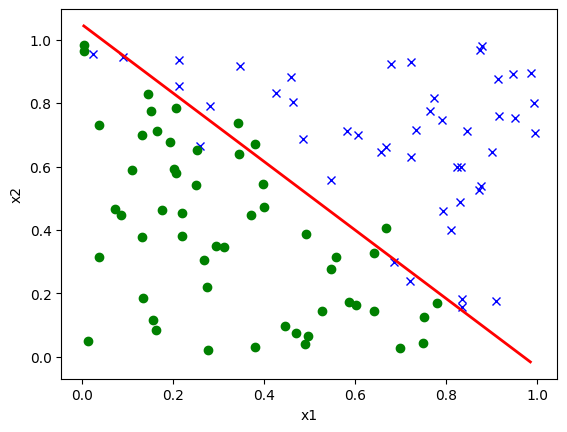

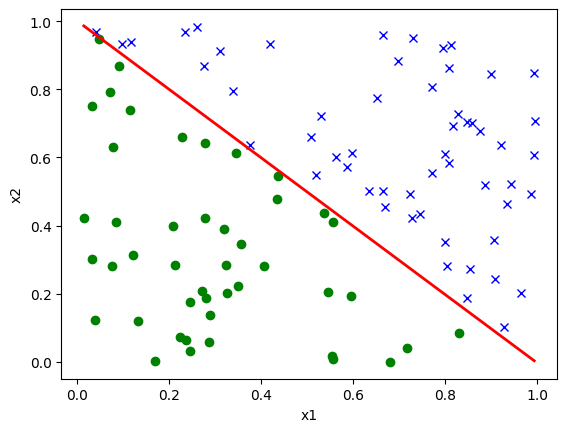

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/cs229/problem-sets/PS2/src') # Python interpreter searches for modules/packages to import from a list of directories called 'PYTHONPATH', which is added to here
import util # import the entire '.py' file, executing any top-level code, and copying all functions, variables, and classes
sys.path.remove('/content/drive/MyDrive/cs229/problem-sets/PS2/src')  # remove added path from 'PYTHONPATH'

%cd /content/drive/MyDrive/cs229/problem-sets/PS2/src/
Xa, Ya = util.load_csv('../data/ds1_a.csv')
Xb, Yb = util.load_csv('../data/ds1_b.csv')

def plot(x, y, theta, correction=1.0):
    """Plot dataset and fitted logistic regression parameters.
    Args:
        x: Matrix of training examples, one per row.
        y: Vector of labels in {0, 1}.
        theta: Vector of parameters for logistic regression model.
        save_path: Path to save the plot.
        correction: Correction factor to apply (Problem 2(e) only).
    """
    # Plot dataset
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == -1, -2], x[y == -1, -1], 'go', linewidth=2)
    # Plot decision boundary (found by solving for theta^T x = 0)
    x1 = np.arange(min(x[:, -2]), max(x[:, -2]), 0.01)
    x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
    plt.plot(x1, x2, c='red', linewidth=2)
    # Add labels and save to disk
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plot(Xa, Ya, [-20.81437788,  21.45295159,  19.85198176])
plot(Xb, Yb, [-129.07604452,  129.40040661,  129.09904542])

1 c)

Using a different learning rate does not help avoid non-convergence issues because the algorithm would still tend to infintely scale theta to maximize likelihood.

Decreasing the learning rate by a factor of $t^{-2}$ would not necessarily help avoid non-convergence issues. If the size of the steps times $t^{-2}$ is smaller than $t^{-1}$, then the algorithm converges.

Linear scaling of the features won't help avoid convergence because it doesn't affect linear separability of the datapoints.

Adding a regularization term would help avoid convergence issues because theta couldn't get arbitrarily large.

Adding Gaussian random noise would solve convergence problems because the datapoints are no longer linearly separable.

1 d)

No, because SVMs maximize geometric not functional margin. So, linearly separable datasets won't cause SVMs to suffer from exploding coefficients.